# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [94]:
# your answer here
temp = pd.read_csv("Temp_States.csv") 

#### Print `temp`

In [95]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

Tenemos 1 tipo float (número con decimales) y 2 objects. Un object es un string en pandas.

In [96]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [97]:
# your answer here
temp.loc[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [98]:
# your answer here
temp.loc[temp.State == 'New York'].mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [99]:
# your answer here
temp.loc[temp.Temperature > 15]

#Otra opción que no muestra la columna Temperature:
#temp[['City', 'State']][temp.Temperature > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [100]:
# your answer here
temp['City'][temp.Temperature > 15]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [101]:
# your answer here
condition = (temp.Temperature > 15) & (temp.Temperature  < 20)
temp.loc[condition, ["City", "Temperature"]]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [102]:
# Opcion1:
temp.groupby(['State']).mean()
temp.groupby(['State']).std()

#opcion2
temp.groupby(['State']).describe()

Temperature                                                        \
                  count       mean       std        min        25%        50%   
State                                                                           
Connecticut         2.0  15.833333  1.964186  14.444444  15.138889  15.833333   
New Jersey          2.0  21.111111  1.571348  20.000000  20.555556  21.111111   
New York            3.0  10.740741  8.133404   3.333333   6.388889   9.444444   

                                   
                   75%        max  
State                              
Connecticut  16.527778  17.222222  
New Jersey   21.666667  22.222222  
New York     14.444444  19.444444

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [103]:
employee = pd.read_csv("employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

- Tenemos una serie de nombres de personas tipo object.
- 3 tipos de Department: HR,IT,Sales
- 3 tipos de Education: Master,Bachelor,Phd
- Gender binario
- 3 tipos de Title: analyst, associate, VP
- Años y salarios distintos

In [104]:
employee.info()
employee.Title .value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 388.0+ bytes


analyst      4
associate    3
VP           2
Name: Title, dtype: int64

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<BarContainer object of 3 artists>

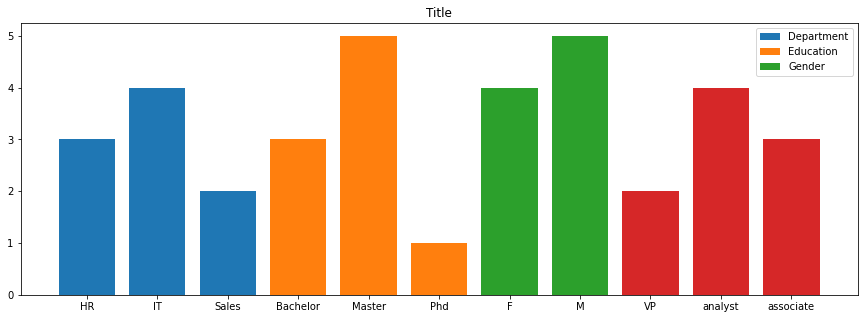

In [171]:
# Para las que son de tipo object

plt.figure(figsize=(15,5)) 
m = employee.groupby('Department').Name.count().reset_index()
plt.title("Department")
plt.bar(m.Department, m.Name)

m = employee.groupby('Education').Name.count().reset_index()
plt.title("Education")
plt.bar(m.Education, m.Name)

m = employee.groupby('Gender').Name.count().reset_index()
plt.title("Gender")
plt.bar(m.Gender, m.Name)

m = employee.groupby('Title').Name.count().reset_index()
plt.title("Title")
plt.legend(['Department', 'Education','Gender', 'Title'])
plt.bar(m.Title, m.Name)


Mayoría de:
- Hombres
- Trabajadores de IT como analistas
- con estudios de master.

La mayoría de las personas cobran entre 50 y 70, y llevan trabajando entre 1 y 4 años.

Se podrían extraer muchas otras conclusiones probando representar histogramas de otra forma.

array([[<AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

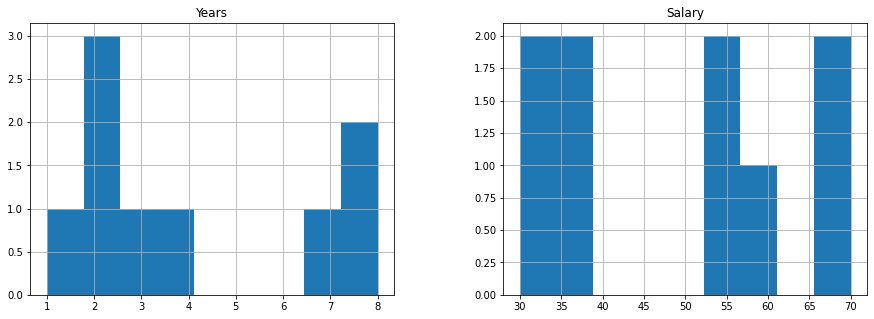

In [162]:
# Para las que son de tipo int
employee.hist(figsize=(15,5),bins=9)

#### What's the average salary in this company?

In [173]:
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [174]:
employee.Salary.max()

70

#### What's the lowest salary?

In [175]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [176]:
employee['Name'][employee['Salary'] == employee.Salary.min()]

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [177]:
employee.loc[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [181]:
employee.loc[employee.Name == 'David', ["Name", "Salary"]]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [183]:
employee.loc[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [185]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [187]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [194]:
condition = (employee.Title == 'associate') & (employee.Salary > 55)
employee.loc[condition]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [221]:
y = employee.groupby('Years').Name.count().reset_index()
s = employee.groupby('Years').Salary.mean().reset_index()
df = pd.DataFrame()
df['Number_people'] = y['Name']
df['Years_working'] = y['Years']
df['Average_salary'] = s['Salary']
df

,Number_people,Years_working,Average_salary
0,1,1,35.000000
1,3,2,38.333333
2,1,3,55.000000
3,1,4,35.000000
4,1,7,60.000000
5,2,8,70.000000


####  What is the average Salary per title?

In [222]:
employee.groupby('Title').Salary.mean().reset_index()


,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

El salario minimo es 30 y el maximo es 70. El 25% cobra más de 60. El 50% cobra entre 35 y 60.
- Q1 ~ 35
- Q3 ~ 60

{'whiskers': [<matplotlib.lines.Line2D at 0x16273748>,
 'caps': [<matplotlib.lines.Line2D at 0x16273aa8>,
 'boxes': [<matplotlib.lines.Line2D at 0x162730b8>],
 'medians': [<matplotlib.lines.Line2D at 0x16273df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16273f88>],
 'means': []}

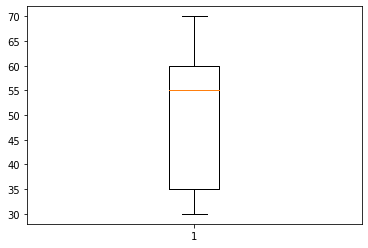

In [224]:
# draw boxplot here
plt.boxplot(employee.Salary) 

In [233]:
# print first quartile here
df = employee.describe()
df.loc['25%'].reset_index()

,index,25%
0,Years,2.0
1,Salary,35.0


In [234]:
# print third quartile here
df.loc['75%'].reset_index()

,index,75%
0,Years,7.0
1,Salary,60.0


#### Is the mean salary per gender different?

Es menor para las mujeres.

In [235]:
employee.groupby('Gender').Salary.mean().reset_index()

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [237]:
employee.groupby('Department').describe().reset_index()

Department Years                                                Salary  \
             count      mean       std  min   25%  50%   75%  max  count   
0         HR   3.0  4.666667  3.055050  2.0  3.00  4.0  6.00  8.0    3.0   
1         IT   4.0  4.500000  3.511885  1.0  1.75  4.5  7.25  8.0    4.0   
2      Sales   2.0  2.500000  0.707107  2.0  2.25  2.5  2.75  3.0    2.0   

                                                    
    mean        std   min    25%   50%   75%   max  
0  45.00  21.794495  30.0  32.50  35.0  52.5  70.0  
1  48.75  19.311050  30.0  33.75  47.5  62.5  70.0  
2  55.00   0.000000  55.0  55.00  55.0  55.0  55.0

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [258]:
df = employee.groupby('Department').Salary.describe().reset_index()
df['Diference'] = df['max']-df['min']
df

,Department,count,mean,std,min,25%,50%,75%,max,Diference
0,HR,3.0,45.00,21.794495,30.0,32.50,35.0,52.5,70.0,40.0
1,IT,4.0,48.75,19.311050,30.0,33.75,47.5,62.5,70.0,40.0
2,Sales,2.0,55.00,0.000000,55.0,55.00,55.0,55.0,55.0,0.0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [262]:
orders = pd.read_csv("Orders.csv") 
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [ ]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here